## Dataset Description
The dataset that I have utilized for the course assignment is “Ames Housing data”. It contains 2,930 observations which is defined by 82 different variables. This dataset contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, Iowa from 2006 to 2010. The 82 variables can be further classified into 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observations identifiers). The first column order is discrete and just represent the observation number. The next is Parcel identification number which can be utilized with city website for parcel review. These two variables are not used in the data exploration process. Some of the important features are-

* **Lot Area**: A continuous variable providing size of the ‘LOT’ in square feet.
* **Lot Shape**: An ordinal variable describing the general shape of the property.
* **Utilities**: An ordinal variable describing the type of public services/utilities available like electricity, gas, water etc.
* **Lot Config**: A nominal variable describing the type of lot in which the property is located like corner lot, inside lot etc.
* **Neighborhood**: A nominal variable describing the locality within Ames city limits.
* **House Style**: A nominal variable describing the style of the house whether it is a one story or two story etc.
* **Year Built**: A discrete variable depicting the original construction date of the property.
* **Year Remod/Add**: A discrete variable giving the remodeling date (Same as construction data if no remodeling is present).
* **Foundation**: A nominal variable giving information about the type of building material used in foundation like brick & tile or Cinder Block etc.
* **Mo Sold**: In which month the property is sold.
* **Yr Sold**: In which year the property is sold.
* **SalePrice**: The selling price of the property in dollars.


### Note from the dataset author:
“There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.”

## Broader perspective of dataset
Before starting any rigorous analysis, I will be analyzing the dataset on broader and abstract level in order to know the data in better way. To do this some obvious and relevant parameters will be analyzed according to my knowledge of housing. Let me get some high level information of the dataset.Before that lets import the important and relevant libraries. 

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('D:\python\exploratory_analysis\data\Ames_Housing_Data.tsv',sep='\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Now let's check the basic details of every parameter. Whether any parameter has missing values or null values. 

In [3]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

As seen from aove the dataset contains three type of parameters viz. object(categorical) type, interger(discrete) type and float(continuous) type. Total number of samples are 2930 but some parameters contains null values, so processing done in later stages. This dataset is not very large in nature and therefore it is adequate for the assignment of this course.
Now let's start with general sales information of the transactions recorded; the cheapest and most expensive sale figure and the overall distribution. 

Cheapest house:$12789		Most expensive house:$755000
Average house sale:$180796.0600682594


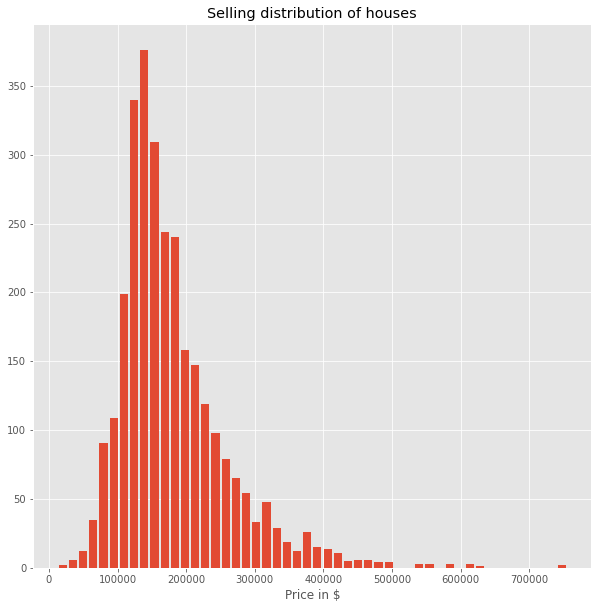

In [4]:
# How expensive are the houses
data.SalePrice.hist(bins=50,rwidth=0.8,figsize=(10,10))
plt.title('Selling distribution of houses')
plt.xlabel('Price in $')
print('Cheapest house:${}\t\tMost expensive house:${}\nAverage house sale:${}'.format(data.SalePrice.min(),data.SalePrice.max(),data.SalePrice.mean()))

This distribution is positively skewed with some outliers.

Oldest house:1872	Newest houses:2010
Maximum Houses were built in 2005


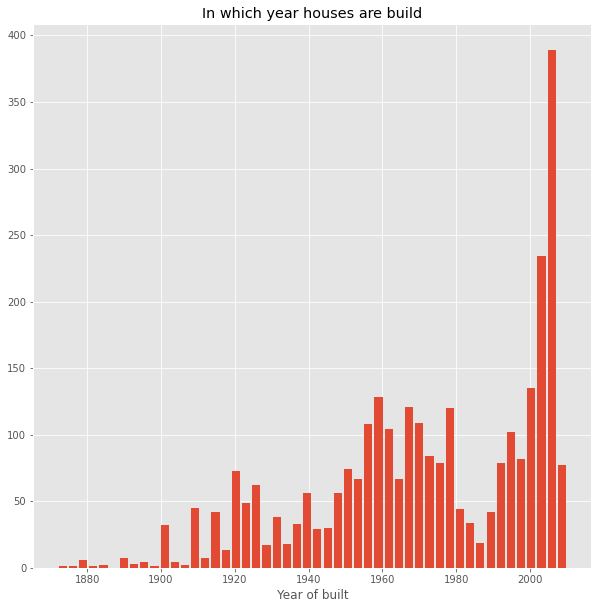

In [5]:
# When were the houses built
data['Year Built'].hist(bins=50,rwidth=0.8,figsize=(10,10))
plt.title('In which year houses are build')
plt.xlabel('Year of built')
print('Oldest house:{}\tNewest houses:{}\nMaximum Houses were built in {}'.format(data['Year Built'].min(),data['Year Built'].max(),data['Year Built'].mode()[0]))

In the early 80s there were very few houses built. The majority of houses were built after 50s

Smallest lot:1300 sqft,	Largest lot:215245 sqft.
Mean lot size is 10147.921843003413 sqft


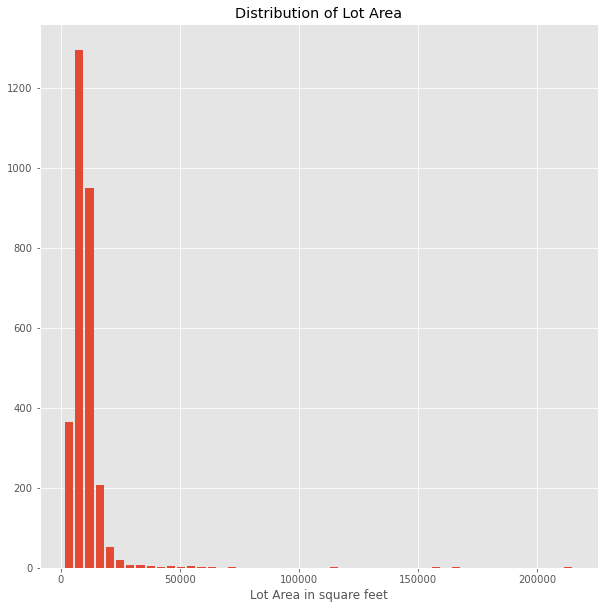

In [6]:
# Size of the lots
data['Lot Area'].hist(bins=50,rwidth=0.8,figsize=(10,10))
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area in square feet')
print('Smallest lot:{} sqft,\tLargest lot:{} sqft.\nMean lot size is {} sqft'.format(data['Lot Area'].min(),data['Lot Area'].max(),data['Lot Area'].mean()))

Smallest house building:334 sqft.	Largest house building:5642 sqft.
Mean house building size is 1499.6904436860068 sqft


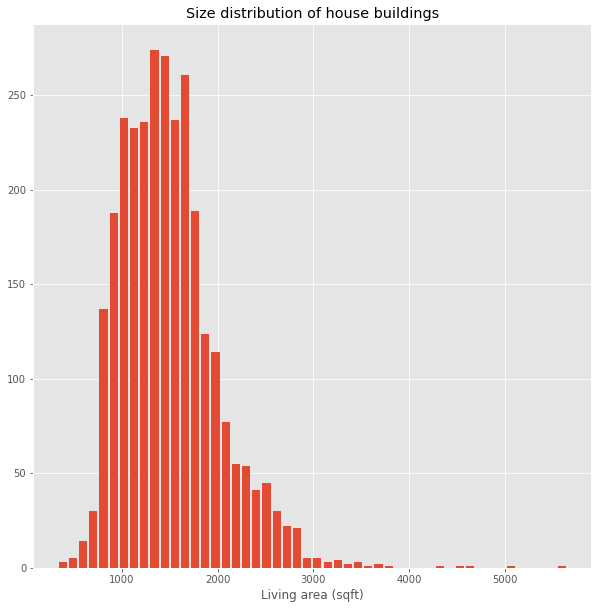

In [7]:
# Size of floor area
data['Gr Liv Area'].hist(bins=50,rwidth=0.8,figsize=(10,10))
plt.xlabel('Living area (sqft)')
plt.title('Size distribution of house buildings')
print('Smallest house building:{} sqft.\tLargest house building:{} sqft.\nMean house building size is {} sqft'.format(data['Gr Liv Area'].min(),data['Gr Liv Area'].max(),data['Gr Liv Area'].mean()))

Both the floor area and lot area distributions are positively skewed but lot area contains plenty of outliers.


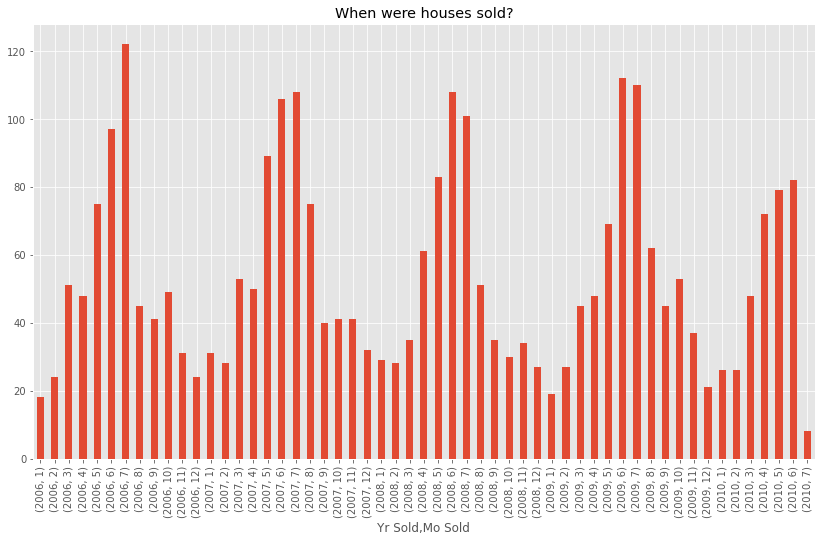

In [8]:
# When were the houses sold?
data.groupby(['Yr Sold','Mo Sold']).Order.count().plot(kind='bar', figsize=(14,8))
plt.title('When were houses sold?')
plt.show()

From the distribution it is observed that there is a seasonal pattern in the house sales with peaks in june, july months.

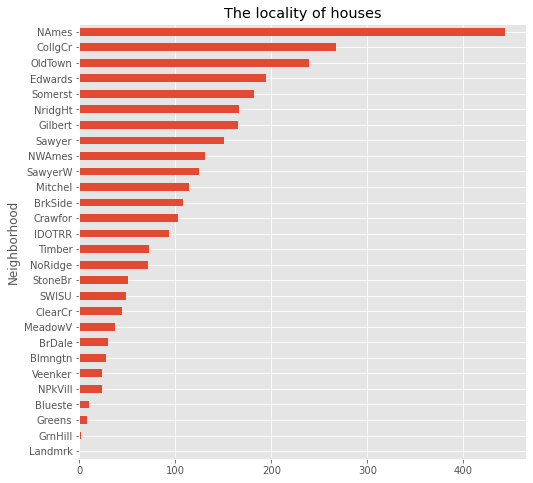

NAmes has the most number of houses: 443
Landmrk has least number of houses: 1


In [9]:
# Where are the houses located?
data.groupby(['Neighborhood']).Order.count().sort_values().plot(kind='barh',figsize=(8,8))
plt.title('The locality of houses')
plt.show()
print('{} has the most number of houses: {}'.format(data.groupby(['Neighborhood']).Order.count().idxmax(),data.groupby(['Neighborhood']).Order.count().max()),'{} has least number of houses: {}'.format(data.groupby(['Neighborhood']).Order.count().idxmin(),data.groupby(['Neighborhood']).Order.count().min()),sep='\n')

There should be a correlation between selling price, the locality and selling time of the houses. There must be other parameters that affects the sale price like quality of school, distance various stations (airport,train and bus station etc.), quality of locality etc. We can see that both the square footage of a house and lot size are positively skewed, but lot size much more so with plenty of outliers. I expect both of these to show significant correlation with sales price. All this will be addressed in the later sections. Now let's begin the more detailed analysis of the dataset.

## Detailed Analysis

In [10]:
def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = data.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Order','PID','SalePrice']) # drop PID, Order and SalePrice

    # Categorical Features
    cat_features = data.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

Let's seperate the numerical and categorical features for ease of access. Out of all the numerical features 'Order' and 'PID' does not play any major role in our analysis so I have removed them. 'SalePrice' is also removed because it is the main feature that is treated as the result feature and all the analysis is done respective to this feature.

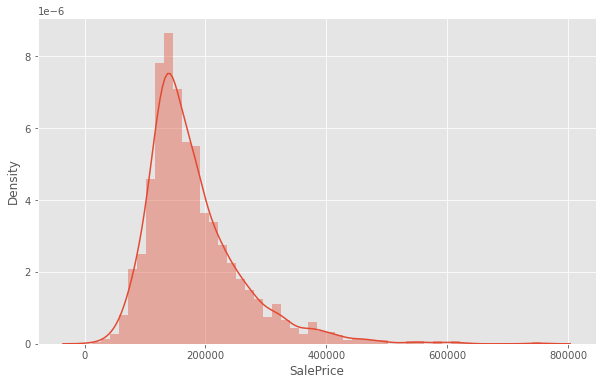

In [11]:
# Let's start with our dependent variable, SalePrice
plt.figure(figsize=(10,6))
sns.distplot(data.SalePrice)
plt.show()

It is observed that SalePrice is positively skewed with majority of house sold in the vicinity of $200000. Let's extract some statistical attributes:

In [12]:
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    data.SalePrice.skew(), data.SalePrice.kurtosis()))

Skew: 1.744 | Kurtosis: 5.119


So it's 'peaky' with fat tails or outliers namely to the right.I'll e transforming this feature later on. Now let's the grid of distribution plots of all numerical features

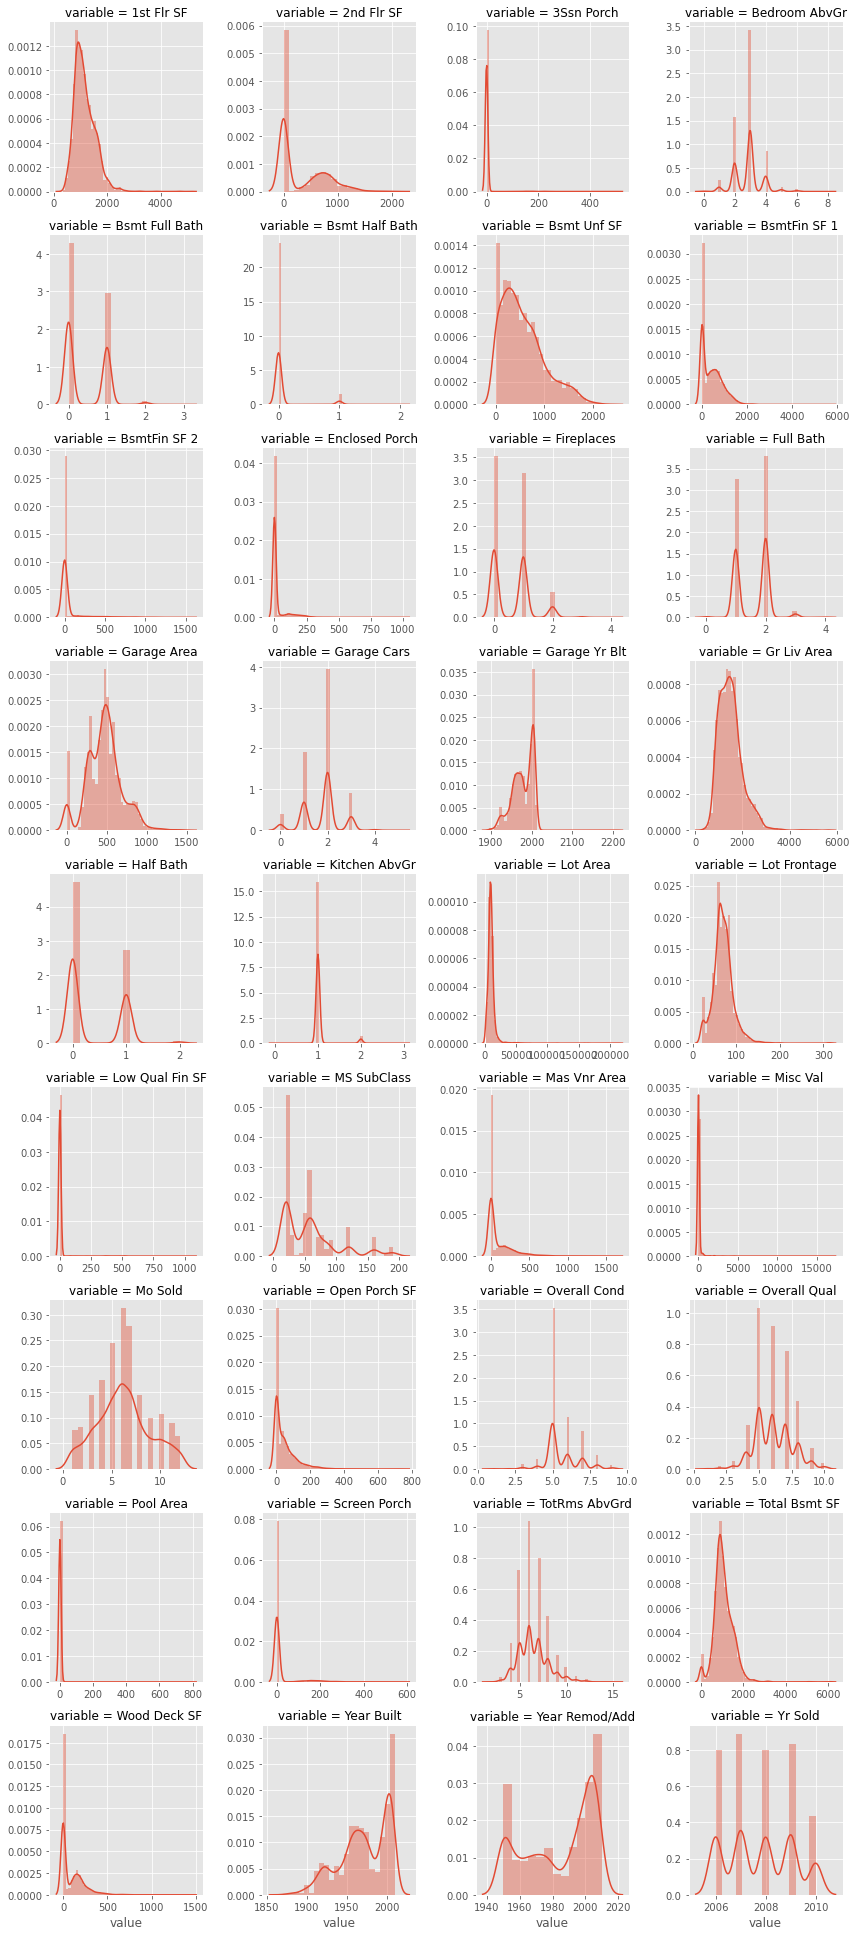

In [13]:
# Grid of distribution plots of all numerical features
f = pd.melt(data, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

We see a bunch of features that look positively skewed, similar to SalePrice. We'll want to log transform these, include: LotFrontage, LotArea, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, GrLivAre, GarageArea

Some features can be considered as count data, and maybe we don't want to transform them: BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotalRmsAbvGr, Fireplaces, GarageCars

We see time related features: YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold

We note that MSSubclass should really be categorical, and make a note to ourselves to take care of this when we process the data later on. We should also treat MoSold as categorical as the Euclidean distance between them doesn't make sense in this application. Same for YrSold. For YearBuilt, however, the distance is relevant as it implies age of the house.

Finally, we have plenty of sparse features that have a large zero count, e.g. PoolArea, which is 0 for houses that have no pool. We'll have to think about how to handle these.

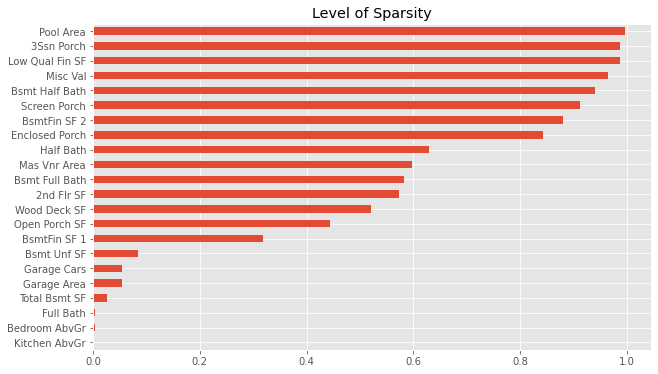

In [14]:
# Percentage of zero values
count_features = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                  'KitchenAbvGr','TotalRmsAbvGr','Fireplaces','GarageCars']
non_count_features = [f for f in num_features if f not in count_features]
sparse_features = (data[non_count_features] == 0).sum() / data.shape[0]
sparse_features[sparse_features > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Level of Sparsity')
plt.show()

The above graph is showing which feature as how much degree of sparsity. The higher the feature in the graph, the larger zero count it contains.

### Categorical Features
Let's transform some of the features to categorical type to incorporate them into our analysis.

In [15]:
data['MS SubClass'] = data['MS SubClass'].apply(lambda x: str(x))
data['Mo Sold'] = data['Mo Sold'].apply(lambda x: str(x))
data['Yr Sold'] = data['Yr Sold'].apply(lambda x: str(x))

# Update our list of numerical and categorical features
num_features, cat_features = get_feature_groups()

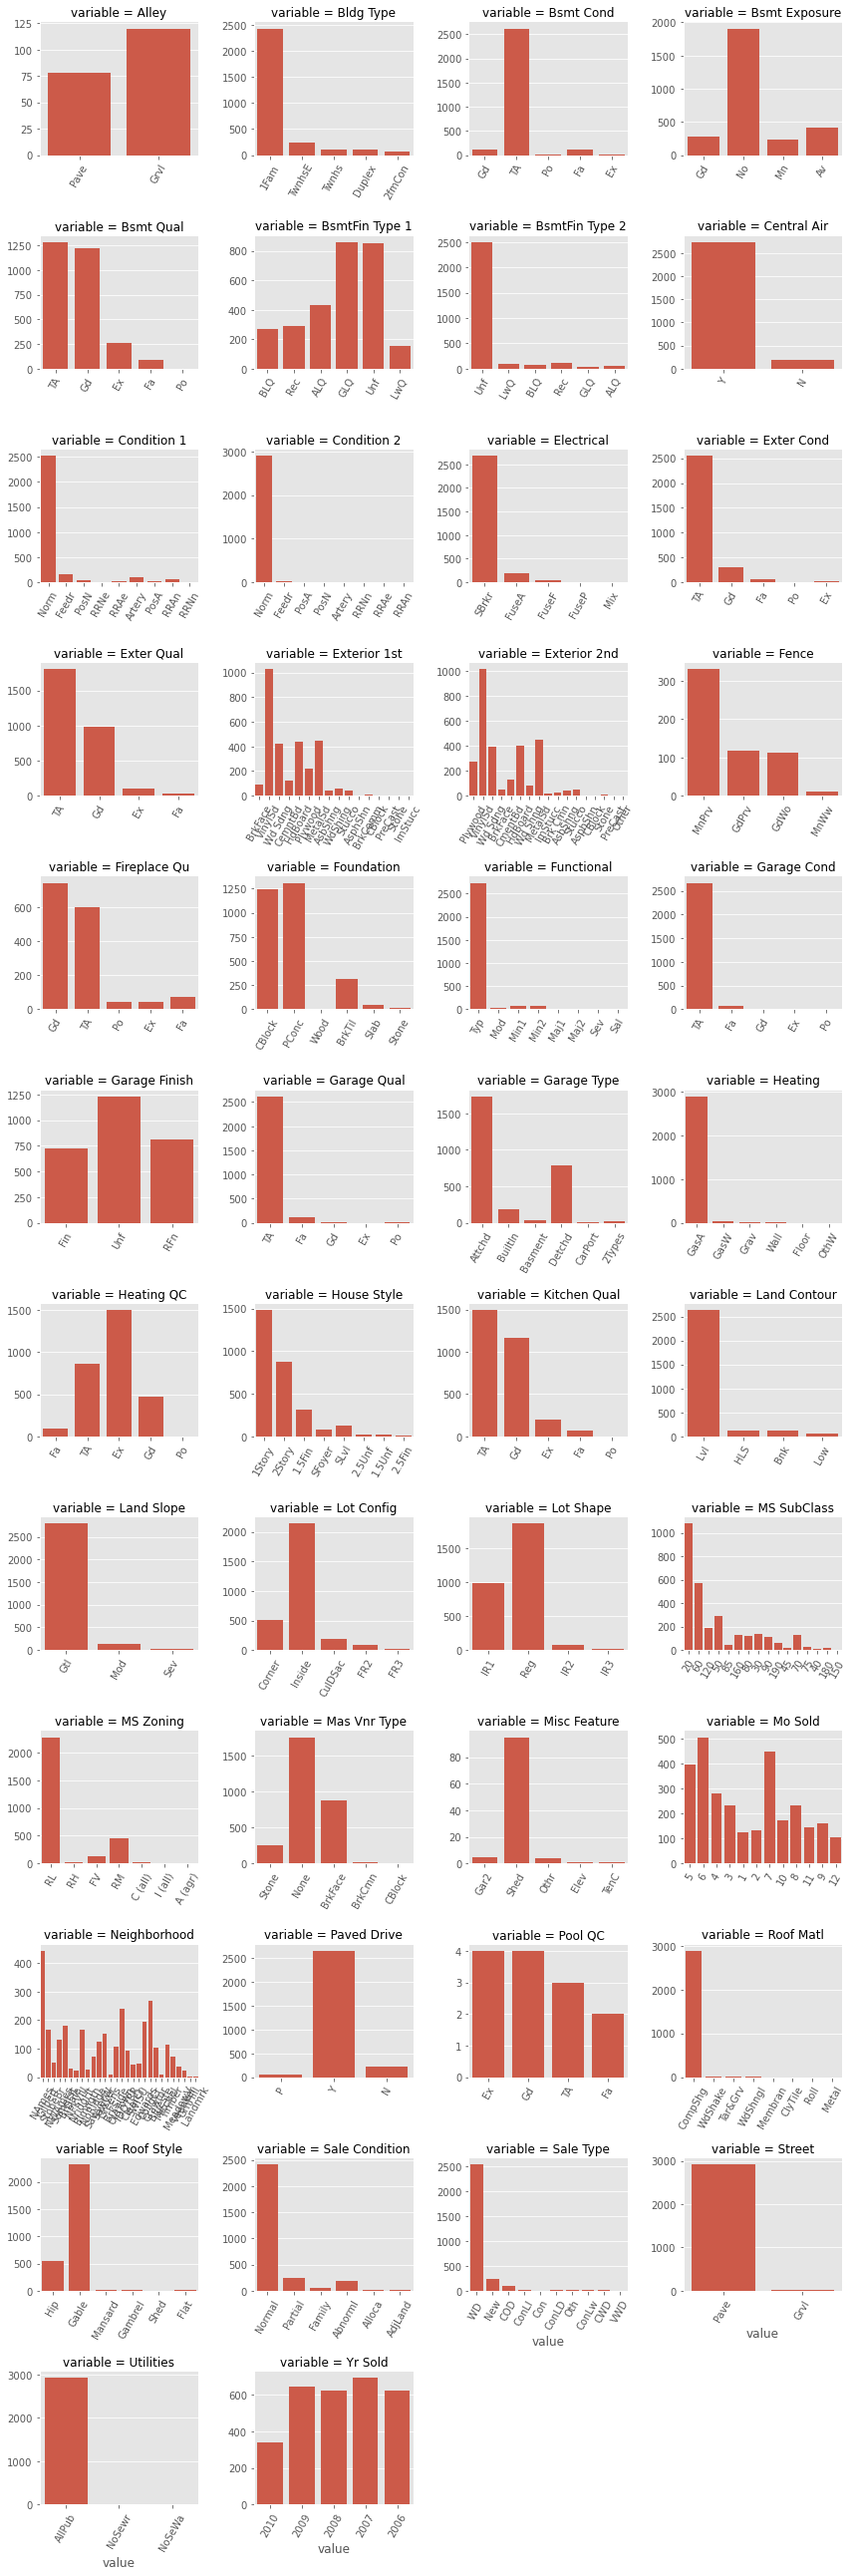

In [16]:
# Count plots of categorical features
f = pd.melt(data, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

The categorical features will be much more interesting when compaired to our target feature SalePrice, but we can note a couple of things nevertheless. First, we note that there are plenty of feature where one value is heavily overrpresented, e.g. Condition2 (Proximity to various conditions (if more than one is present)), where nearly 99% of houses are listed as "Norm". That's fine though, as those edge cases may help us predict outliers.

The second thing to realize is that a number of categorical features actually contain rank information in them and should thus be converted to discrete quantitative features similar to OverallQual. For example, ExterQual has the following values:

* Ex - Excellent
* Gd - Good
* TA - Average/Typical
* Fa - Fair
* Po - Poor

We should change these to be 1 to 5. We'll do that for the following features: Alley, LotShape, LandContour, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQuality, GarageCond, PavedDrive, PoolQC

There is a lot of numerical features that can e extracted from the categorical features.
Now let's transform some earlier listed caategorical features to numerical features. Also let's replace the missing values with 0.

In [17]:
# Alley
data.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
data['Lot Shape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
data['Land Contour'].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
data.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
data['Land Slope'].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
data['Exter Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
data['Exter Cond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
data['Bsmt Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
data['Bsmt Cond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
data['Bsmt Exposure'].replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
data['BsmtFin Type 1'].replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
data['BsmtFin Type 2'].replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
data['Heating QC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
data['Kitchen Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
data.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
data['Fireplace Qu'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
data['Garage Finish'].replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
data['Garage Qual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
data['Garage Cond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
data['Paved Drive'].replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
data['Pool QC'].replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# We'll set all missing values in our newly converted features to 0
converted_features = ['Alley','Lot Shape','Land Contour','Utilities','Land Slope','Exter Qual','Exter Cond',
        'Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC',
        'Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual',
        'Garage Cond','Paved Drive','Pool QC']
data[converted_features] = data[converted_features].fillna(0)

# Update our list of numerical and categorical features
num_features, cat_features = get_feature_groups()

### Numerical Features

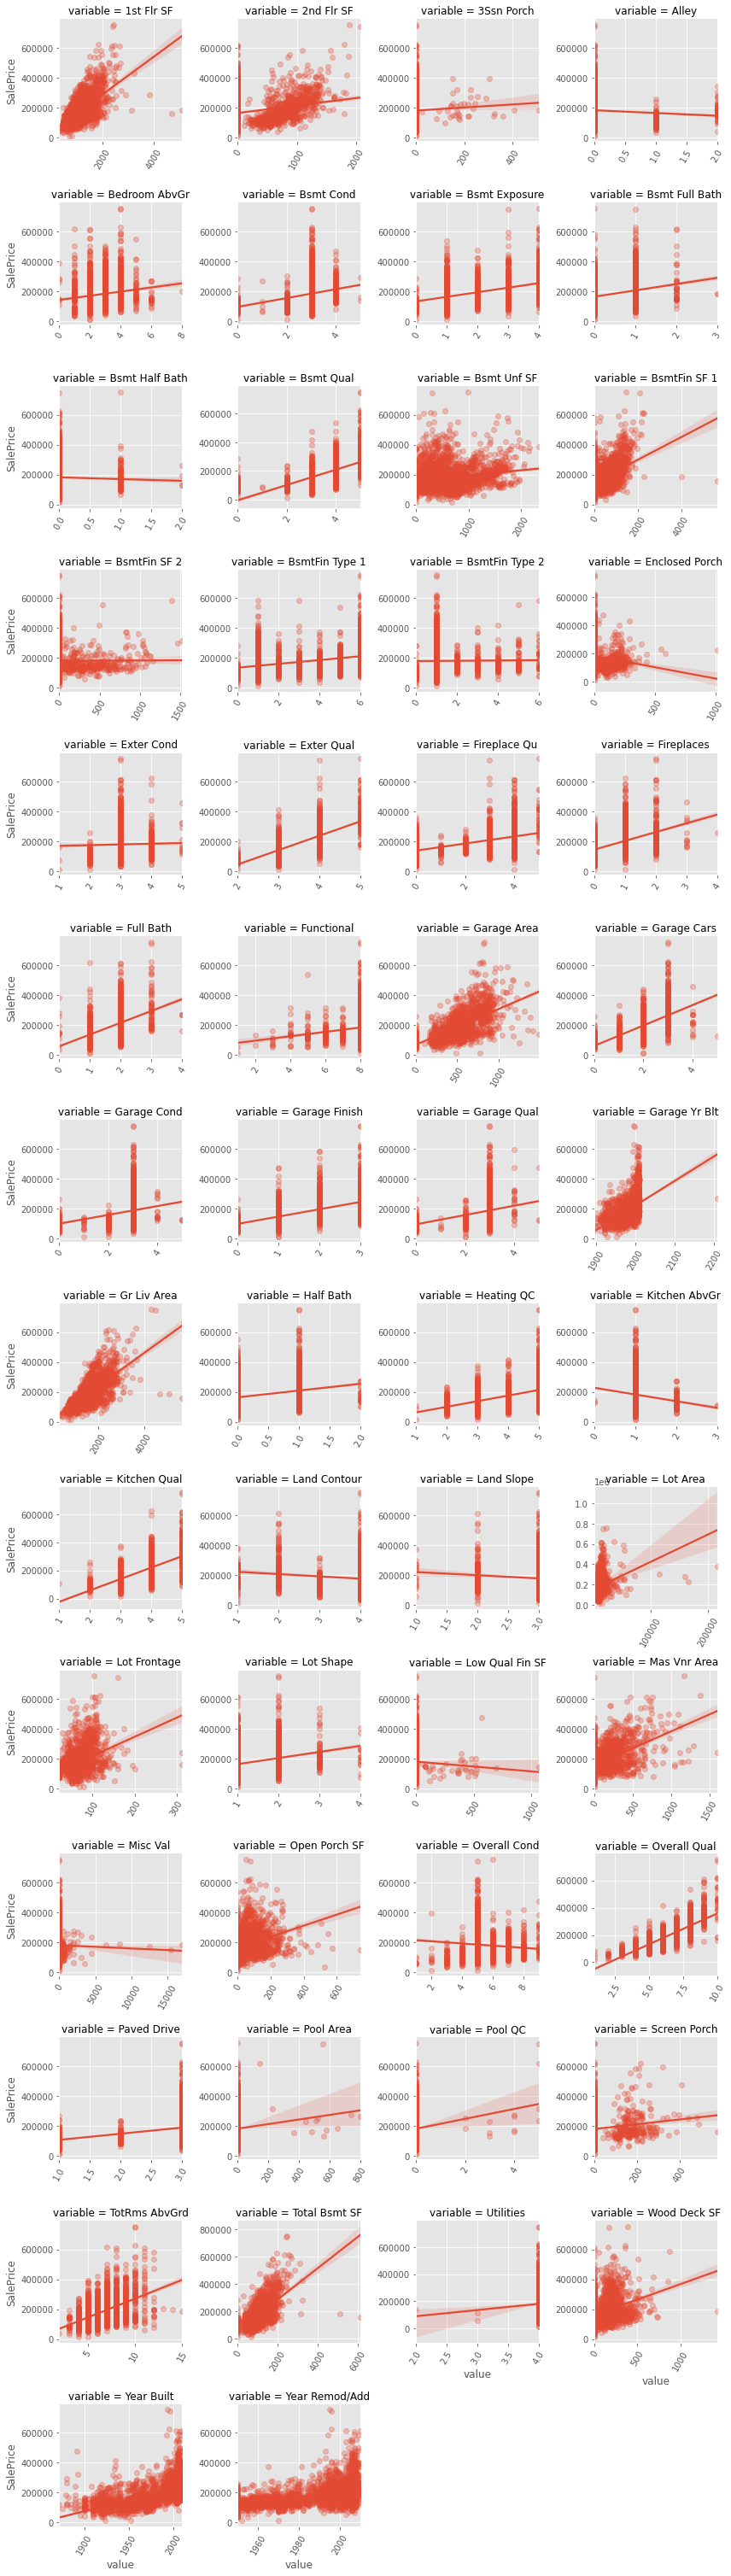

In [18]:
# Scatter plots of numerical features against SalePrice
f = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

We find that there are quite a few features that seem to show strong correlation to SalePrice, such as OverallQual, Total Bsmt SF, Gr Liv Area, and TotRmsAbvGrd. This confirms our natural intuition: we would expect that high quality, big house with big basements and lots of rooms to be more expensive. Some other features that show correlation to SalePrice are Exter Qual, Full Bath, Garage Area, Kitchen Qual, Lot Area; the increse in the quality/quantity of these features also result in more expensive houses. It is also noted that most of the features show positive correlation with the SalePrice.

We also note the occurrence of cone shapes, an artifact of our skewed distributions. Once we log transform some of these features, the relationship will be more linear.

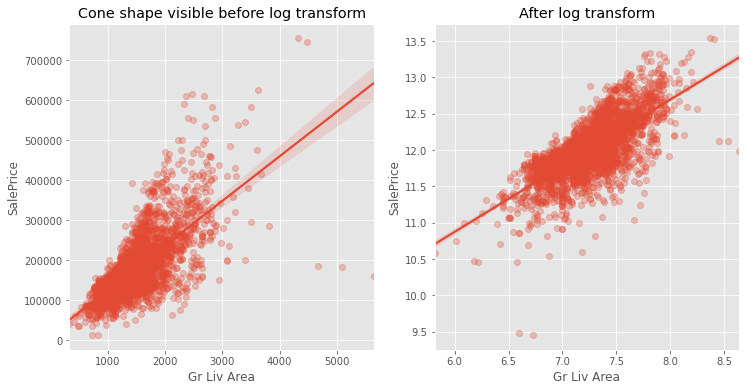

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(data['Gr Liv Area'], data.SalePrice, scatter_kws={'alpha':0.3})
plt.title('Cone shape visible before log transform')

plt.subplot(122)
sns.regplot(np.log1p(data['Gr Liv Area']), np.log1p(data.SalePrice), scatter_kws={'alpha':0.3})
plt.title('After log transform')
plt.show()

Now let's find out the correlation between rest of the numerical features. It is very important to link different features between themselves as they often result in the uncommon but interesting trends in the dataset 

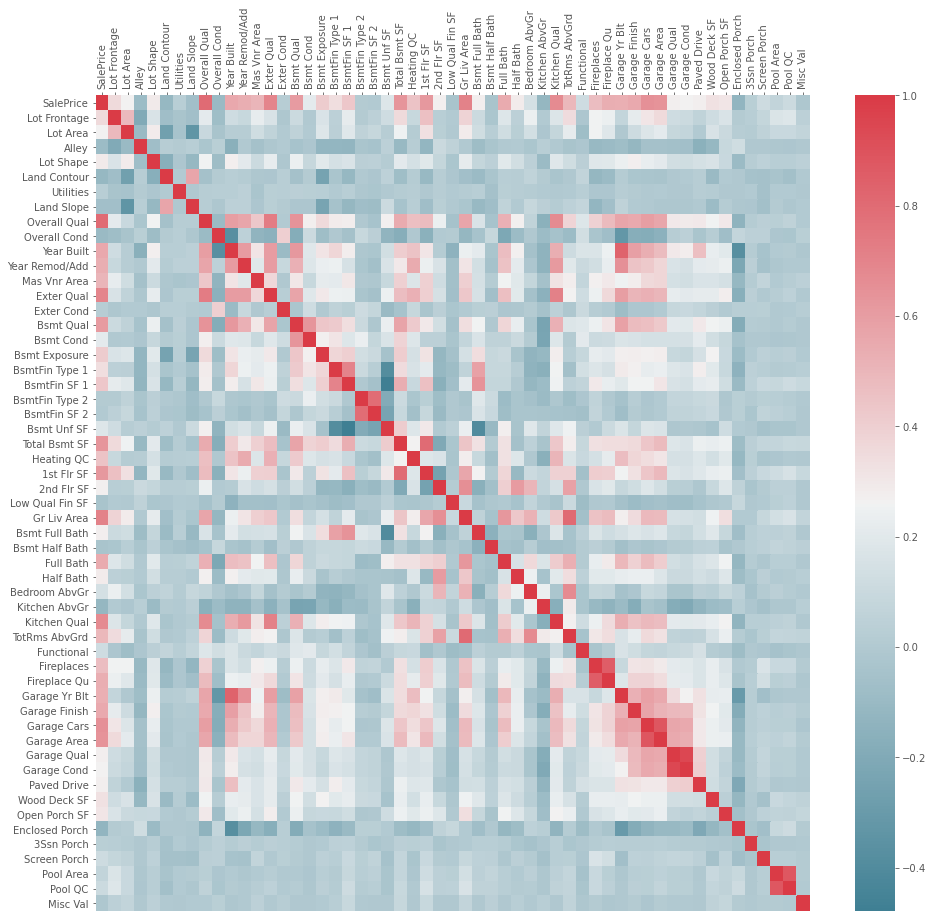

In [20]:
# Let's take a look at the correlation between numerical features
corr = data[['SalePrice'] + num_features].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

We see that there is quite bit of correlation between features, many of which one might expect to find, and perhaps some surprising ones. For example, we find that GarageYrBlt is highly correlated with YearBuilt, which means that most garages were built along with the house. BsmtQual correlates with OverallQual and TotalBsmtSF correlates highly with 1stFlrSF, which both make a lot of sense. We also see that KitchenQual correlates highly with ExteriorQual; kitchens and housing exteriors are of course two separate things, but may point to a lurking variable, such as "new house": a newer house is likely to have both a better exterior and better kitchen. Now let's plot the degree of correlation of different features with the SalePrice

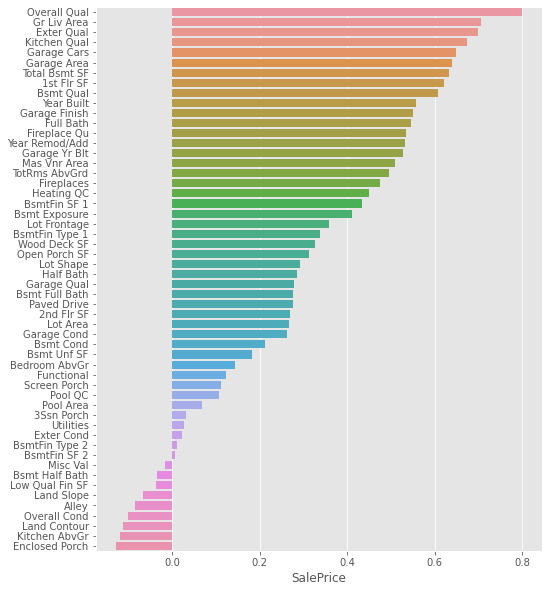

In [21]:
# Feature sorted by correlation to SalePrice, from positive to negative
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

The feature most correlated with SalePrice is OverallQual, which makes sense, followed by the size of the house (GrLivArea) and then three more quality related features: ExterQual, KitchenQual, and BsmtQual. We noted earlier that ExterQual and KitchenQual were highly correlated with one another, and now we find out that they are both also highly correlated with SalePrice.

### Modified Categorical features
Now let's look at the how the SalePrice relates to modified categorical variables.

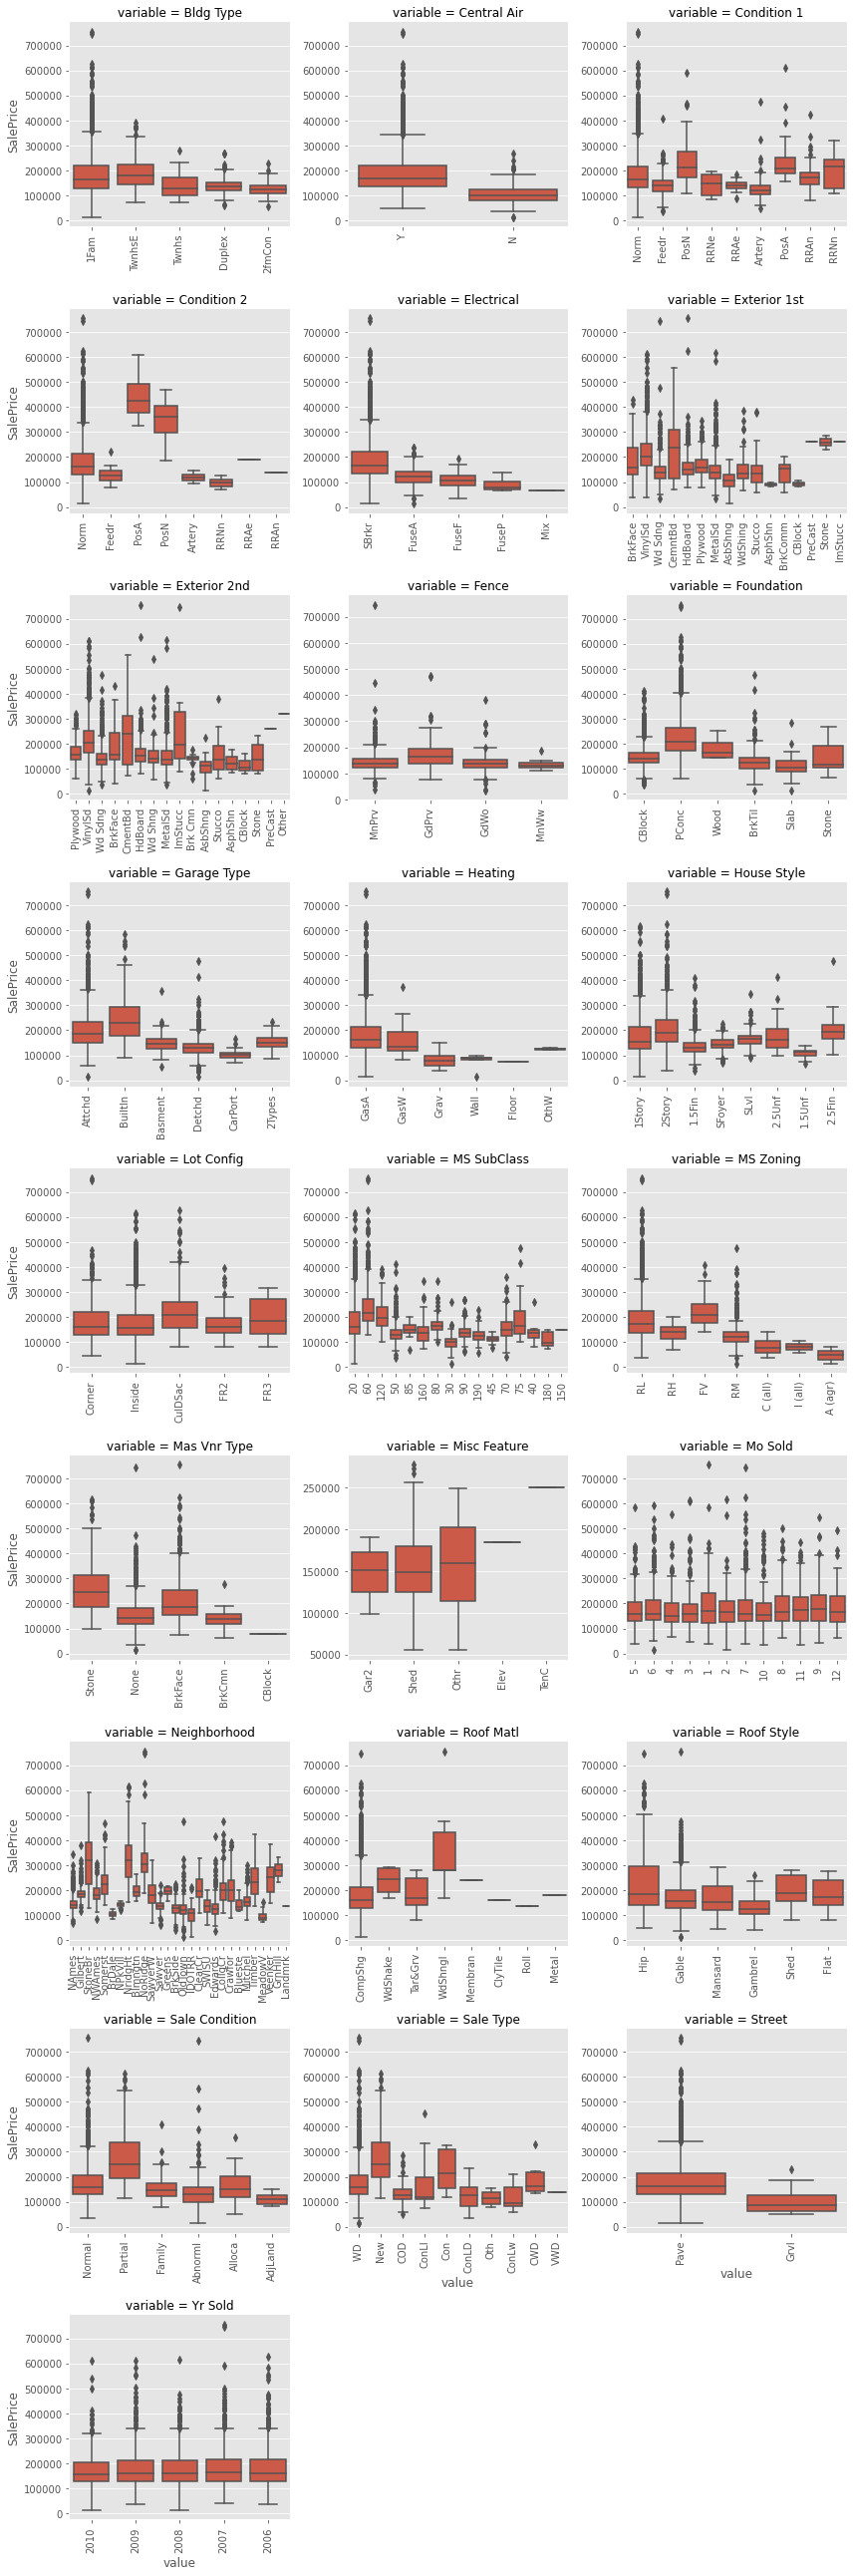

In [22]:
# Count plots of categorical features
f = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

It looks like some features show significant variance in the mean of SalePrice between different groups, eg. Neighborhood, SaleType or MSSubClass.

However, we’d like to have a better sense of which feature influences SalePrice more than others. What we’ll do is run one-way ANOVA tests for each categorical feature againt SalePrice. This will give us both the F statistic and p-values for each feature. The higher the F statistic, the higher the p-value (i.e. the more confident we can be in rejecting the null hypothesis), but since the p-value will take into consideration a given F distribution (based on number of groups and number of observations), we will ultimately sort the features by p-value (instead of F).

But in order to ANOVA to work, first all the missing values must be taken care of.

In [23]:
data[cat_features] = data[cat_features].fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in data[cat].unique():
        group_prices.append(data[data[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)


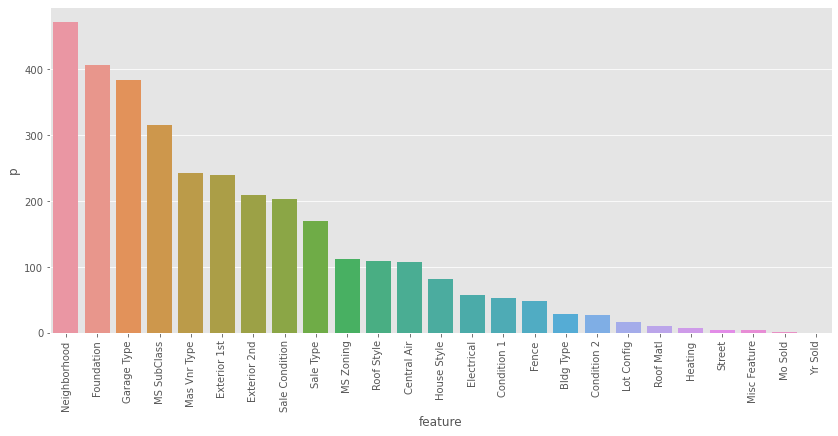

In [24]:
data[cat_features] = data[cat_features].fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in data[cat].unique():
        group_prices.append(data[data[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
# anova['p'] = [anova['p'][(i + 1) % len(anova['p'])]
#                for i, x in enumerate(anova['p'])]
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)


# Plot
plt.figure(figsize=(14,6))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

Of all our categorical features, Neighborhood appears to have the greatest influence on SalePrice.

It's important to note here that the chart really undersells how much more influence Neighborhood has. We took the log of the inverse of the p-value (np.log(1./anova['p']): the inverse so that when we take the log we get positive numbers, and log so that we don't just see a single bar. In other words, the p-value is a magnitude of about 100 times smaller than the next feature!

### Miscellaneous Visualization
Let's further look at the visualizations of relations between categorical and numerical features.

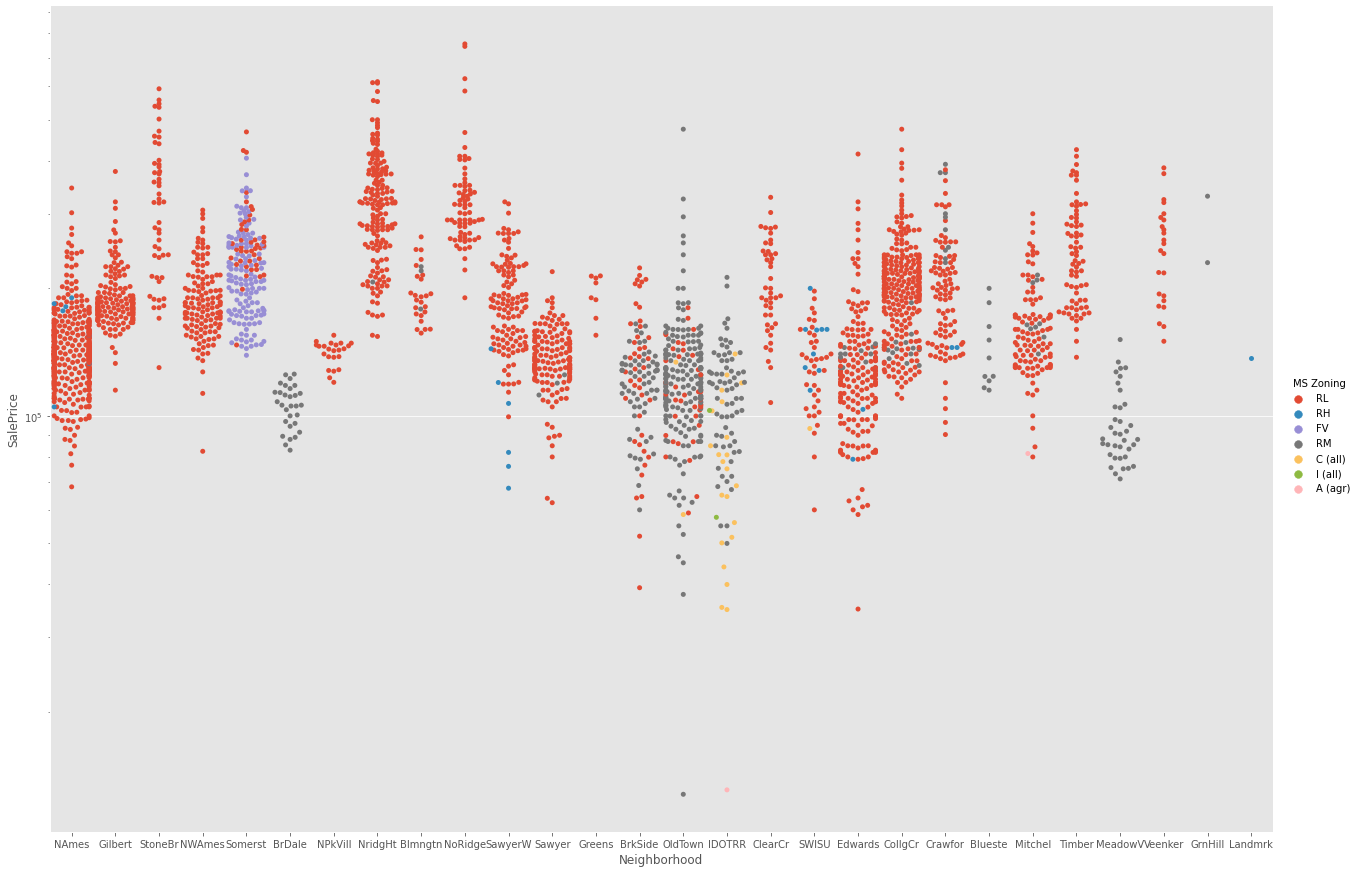

In [26]:
# Swarming Factorplot FTW
fig = sns.factorplot(x='Neighborhood', y='SalePrice', hue='MS Zoning', data=data, kind='swarm', size=12, aspect=1.5)
ax = fig.axes[0][0]
ax.set_yscale('log')
plt.show()

Here we're looking at sales price by neighborhood and color-coding by zoning classificaton of the sale. It looks like there is clearly some strong relationships between some neighborhoods and zoning classifications: Old Town, Brooksize, Iowa DOT and Rail Road, Meadow Village and Briardale are all predominantly in a "Residental Medium Density" zone, while Somerset is in a "Floating Village Residential" zone

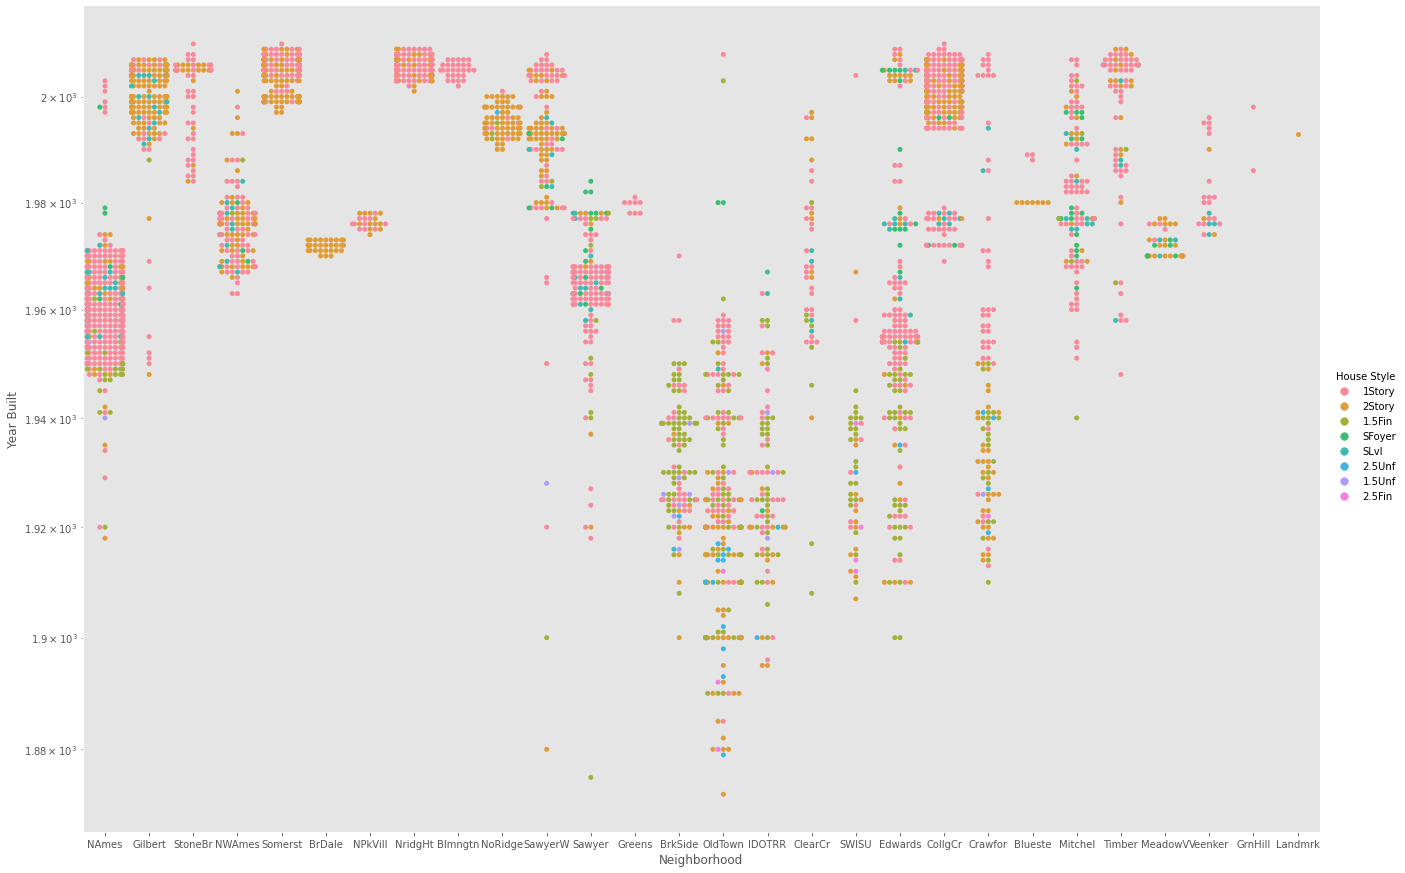

In [27]:
# Peering into the history of Ames, IA
fig = sns.factorplot(x='Neighborhood', y='Year Built', hue='House Style', data=data, kind='swarm', size=12, aspect=1.5)
ax = fig.axes[0][0]
ax.set_yscale('log')
plt.show()

 We're plotting houses by the year they were built, in which neighborhood, and what kind of house style was used (e.g. "2.5Fin -> Two and one-half story: 2nd level finished"). We can easily see why Old Town is called Old Town: that's where houses were being built before 1900. We see some neighborhoods gradually developing, like Crawford, while others were developed in a short amount of time, e.g. Northridge Heights or College Creek. It also looks like the housing style changed over time, and in some cases clusters in a neighborhood. For example, the 50s and 60s were a popular time for one story houses (I'm picturing post-WWII newly built suburbs), while two-story houses were more in vogue in the 90s. "Split Foyer" had their golden age in the 70s. As we noted earlier, there seems to have been a dearth in houses built in the 80s for some reason